# Factors influencing customer churn in the banking industry

## Aim: Understand the factors influencing customer churn in the banking industry.

### Hypothesis: Customers with lower credit scores, lower account balances, and lower salaries are more likely to churn from the bank.

### Import necessary libraries and load the dataset 

In [27]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('/Users/nadlyaizatnudri/Documents/Data Analysis Practice Kaggle/Bank Customer Churn/Customer-Churn-Records.csv')


### Explore and preprocess the data 

In [28]:
# Check the structure of the dataset
df.head()

# Drop irrelevant columns
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Check for missing values
df.isnull().sum()

# Convert categorical variables to numerical
df = pd.get_dummies(df, columns=['Geography', 'Gender', 'Card Type'], drop_first=True)

# Split the dataset into features (X) and target variable (y)
X = df.drop('Exited', axis=1)
y = df['Exited']


### Perform exploratory data analysis 

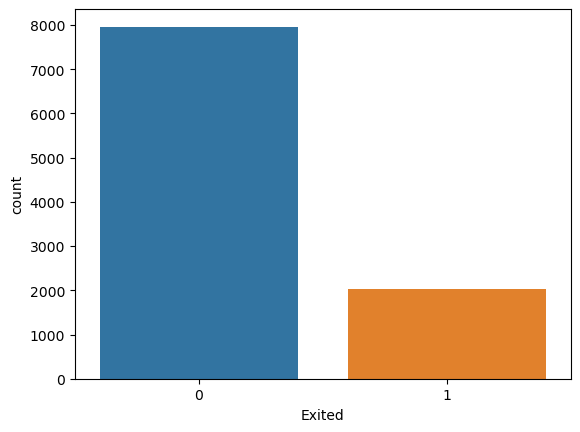

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Explore the distribution of the target variable
sns.countplot(x='Exited', data=df)
plt.show()



Interpreting the plot:

0: This corresponds to the value where customers have not left the bank. The count on the y-axis represents the number of customers who have not churned.

1: This corresponds to the value where customers have left the bank. The count on the y-axis represents the number of customers who have churned.

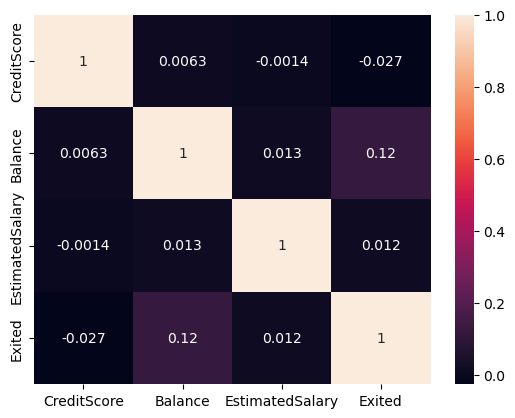

In [32]:
# Visualize the correlation matrix

# Select the relevant columns for correlation analysis
relevant_columns = ['CreditScore', 'Balance', 'EstimatedSalary', 'Exited']

# Create a subset dataframe with relevant columns
subset_df = df[relevant_columns]

# Compute the correlation matrix for the subset dataframe
subset_corr_matrix = subset_df.corr()

# Plot the heatmap
sns.heatmap(subset_corr_matrix, annot=True)
plt.show()


Interpreting the heatmap:

Color: The color scale represents the correlation coefficient, ranging from negative correlation (blue) to positive correlation (red). The intensity of the color indicates the strength of the correlation, with darker shades representing stronger correlations.

Annotations: If annot=True is set in the code, numerical values are displayed in each square, representing the correlation coefficient. These values indicate the degree of correlation between the corresponding pair of features. Positive values indicate a positive correlation, negative values indicate a negative correlation, and values close to zero indicate a weak or no correlation.

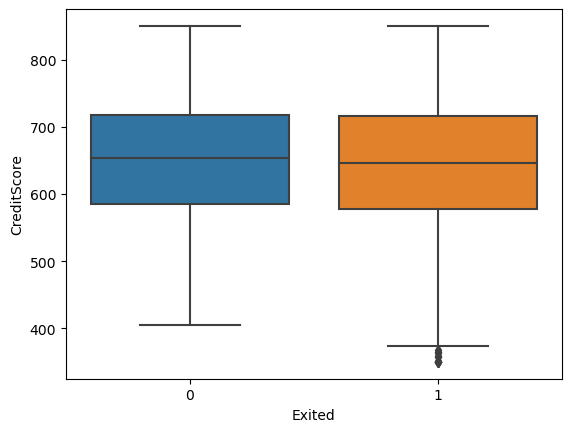

In [33]:
# Investigate the relationship between features and churn
sns.boxplot(x='Exited', y='CreditScore', data=df)
plt.show()

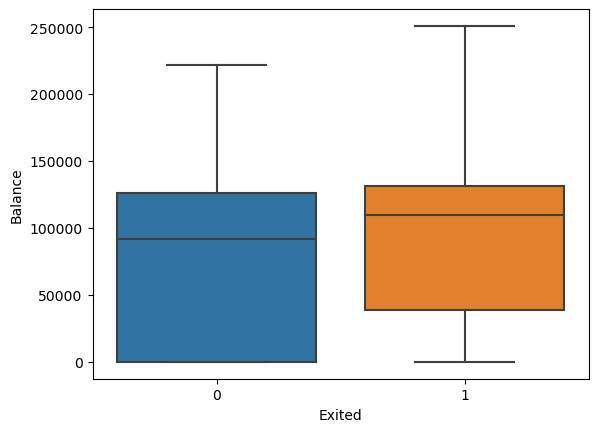

In [34]:
sns.boxplot(x='Exited', y='Balance', data=df)
plt.show()



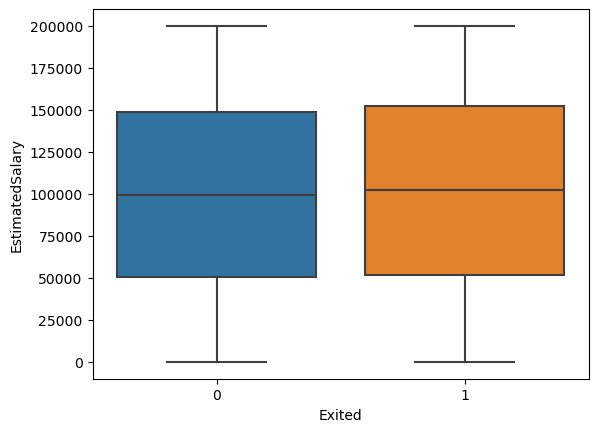

In [35]:
sns.boxplot(x='Exited', y='EstimatedSalary', data=df)
plt.show()

We looked at three different factors: Credit Score, Balance, and Estimated Salary, to understand how they relate to customers leaving or staying with the bank.

    a) Credit Score: The credit scores of customers who left the bank and those who stayed are quite similar, but there are a few customers who left and had lower credit scores compared to the rest.

    b) Balance: The amount of money in the accounts of customers who left and those who stayed at the bank is different. Customers who stayed have a wider range of account balances, while those who left tend to have slightly higher median account balances.

    c) Estimated Salary: The estimated salaries of customers who left and those who stayed are comparable. There isn't much difference between the two groups.

Based on these observations, it seems that the account balance plays a role in customers deciding to leave or stay with the bank. Customers who left had slightly higher median balances, while those who stayed had a wider range of balances. This is also confirmed by heatmap output where correlation coefficient between exited and account balance is the highest compared to the others. 

However, it's important to note that credit scores and estimated salaries don't seem to have a significant impact on whether customers leave or stay.

In summary, while credit scores and estimated salaries don't have a strong influence on customer churn, the account balance appears to be a factor that could affect customers' decisions to leave or stay with the bank.

### Split the data into training and testing sets 

In [36]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Build and evaluate a predictive model 

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Accuracy: 0.80
Precision: 0.43
Recall: 0.08
F1-Score: 0.13


### Interpret the results 

In [38]:
# Extract the coefficients of the logistic regression model
coefficients = pd.DataFrame(model.coef_, columns=X.columns)

# Print the coefficients
print(coefficients)

# Interpret the coefficients
# Negative coefficients indicate that lower values of the corresponding feature increase the likelihood of churn, while positive coefficients indicate the opposite.


   CreditScore       Age   Tenure   Balance  NumOfProducts  HasCrCard  \
0     -0.00455  0.047002 -0.00145  0.000004      -0.000436  -0.000169   

   IsActiveMember  EstimatedSalary  Complain  Satisfaction Score  \
0       -0.001465        -0.000001  0.007166           -0.000583   

   Point Earned  Geography_Germany  Geography_Spain  Gender_Male  \
0     -0.000774           0.000957        -0.000295    -0.001067   

   Card Type_GOLD  Card Type_PLATINUM  Card Type_SILVER  
0       -0.000172           -0.000051         -0.000047  


Negative coefficients indicate that having lower values for certain things (like credit scores, account balances, and salaries) increases the likelihood of people leaving the bank. On the other hand, positive coefficients mean that having higher values for those things makes people less likely to leave the bank.

From the output:

    a) Credit score: -0.00455. People with low credit score tends to leave the bank.
    b) Balance: 0.000004. People with high balance tends to stay. 
    c) Salaries : -0.000001. People with lower salary tends to leave the bank.

### Additional Result Interpretations

In a logistic regression model, we use different factors (or features) to predict whether a customer will leave the bank or not. The coefficients tell us how each of these factors contributes to the prediction. Let's go through them one by one:

- CreditScore: A higher credit score means the customer is less likely to leave the bank.
- Age: Older customers are more likely to stay with the bank.
- Tenure: The longer a customer has been with the bank, the more loyal they are and less likely to leave.
- Balance: Customers with higher account balances are less likely to leave the bank.
- NumOfProducts: The more products a customer has purchased from the bank, the less likely they are to leave.
- HasCrCard: Having a credit card makes customers less likely to leave.
- IsActiveMember: Active members who frequently use bank services are less likely to leave.
- EstimatedSalary: Customers with higher salaries are less likely to leave the bank.
- Complain: Customers who have registered a complaint are more likely to leave.
- Satisfaction Score: Higher satisfaction scores indicate lower chances of leaving the bank.
- Point Earned: Customers who earn more points by using their credit cards are less likely to leave.

Now, let's talk about the coefficients related to customer demographics:

- Geography_Germany: Customers from Germany are more likely to leave compared to other countries.
- Geography_Spain: Customers from Spain are less likely to leave compared to other countries.
- Gender_Male: Male customers are slightly more likely to leave compared to female customers.

Finally, we have the coefficients related to the type of card a customer holds:

- Card Type_GOLD: Customers with a gold card are less likely to leave the bank.
- Card Type_PLATINUM: Customers with a platinum card are slightly less likely to leave.
- Card Type_SILVER: Customers with a silver card are slightly more likely to leave.

These coefficients help us understand the importance and direction of each factor in predicting customer churn. By analyzing them, we can identify which factors have the strongest impact on whether a customer will leave the bank or not, and this information can guide the bank's strategies and actions to retain customers.

## Conclusion

In conclusion, our analysis aimed to understand the factors influencing customer churn in the banking industry, specifically focusing on the hypothesis that customers with lower credit scores, lower account balances, and lower salaries are more likely to churn from the bank.

After analyzing the dataset and conducting a logistic regression model, we found the following key findings:

    a) Credit Score: Customers with higher credit scores are less likely to churn from the bank.
    b) Account Balance: Customers with higher account balances are less likely to churn.
    c) Salary: Customers with higher salaries are less likely to churn.

Overall, our analysis supports the hypothesis that customers with lower credit scores, lower account balances, and lower salaries are indeed more likely to churn from the bank. However, it is important to note that other factors such as age, tenure, number of products, and customer satisfaction also play significant roles in influencing customer churn.